# EDA


In [146]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import missingno as msno
pd.options.display.float_format = '{:.2f}'.format
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

import torch 
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader


from sklearn.metrics import r2_score, mean_squared_error, mean_squared_log_error

# https://www.kaggle.com/vaibhav2025/ppp-loans-during-the-covid19-pandemic-in-usa/metadata

# Load in data 
Use Pandas to import csv file. the columns are sperated by '|' so we set sep='|'

In [96]:
df = pd.read_csv('/Users/stephen/Desktop/PPP_Loans/Data/query_20211221_082058.csv', sep='|')

In [97]:
df.head()

,loannumber,originatinglenderlocationid,cert,cb,stchrtr,dateapproved,borrowername,borrowercity,borrowerstate,originatinglender,originatinglendercity,originatinglenderstate,naicscode,ruralurbanindicator,lmiindicator,minority,currentapprovalamount,jobsreported,forgivenessamount
0,9547167709,19248.00,873.00,0.00,1.00,2020-05-01 00:00:00.000000,Q AND J SERVICES LLC,Manning,NaN,Synovus Bank,COLUMBUS,GA,541990.00,U,1.00,NaN,136520.96,170.00,137747.78
1,9589997709,57328.00,6560.00,0.00,0.00,2020-05-01 00:00:00.000000,"TJK KITCHENS &AMP; BREWPUBS, LLC",NaN,NaN,The Huntington National Bank,COLUMBUS,OH,238990.00,U,0.00,NaN,109988.00,8.00,110881.96
2,5569977708,9551.00,3510.00,0.00,0.00,2020-05-01 00:00:00.000000,NOT AVAILABLE,NaN,NaN,"Bank of America, National Association",CHARLOTTE,NC,339114.00,U,0.00,NaN,90394.00,20.00,91404.43
3,9595817708,57328.00,6560.00,0.00,0.00,2020-05-01 00:00:00.000000,STERLING HOME CARE INC,NaN,NaN,The Huntington National Bank,COLUMBUS,OH,621610.00,U,0.00,NaN,79003.00,6.00,79699.96
4,9810697702,57328.00,6560.00,0.00,0.00,2020-05-01 00:00:00.000000,BRILACK INC,NaN,NaN,The Huntington National Bank,COLUMBUS,OH,424410.00,U,0.00,NaN,57430.00,4.00,57922.48


In [98]:
print(f"The dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

The dataset contains 8863652 rows and 19 columns.


In [99]:
df.describe()

,loannumber,originatinglenderlocationid,cert,cb,stchrtr,naicscode,lmiindicator,minority,currentapprovalamount,jobsreported,forgivenessamount
count,8863652.00,8863642.00,6087184.00,6087184.00,6087184.00,8731249.00,8863648.00,2268874.00,8863652.00,8863645.00,3999455.00
mean,5532315709.90,202928.59,20587.82,0.39,0.61,530434.31,0.29,0.56,66553.74,7.56,96772.32
std,2590909044.79,203155.97,19532.27,0.49,0.49,200758.69,0.45,0.50,275385.15,26.31,317108.13
min,1000007108.00,20.00,35.00,0.00,0.00,111110.00,0.00,0.00,0.00,-6.00,0.01
25%,3327685052.75,41921.00,4239.00,0.00,0.00,445220.00,0.00,0.00,9000.00,1.00,10823.23
50%,5548108106.00,96485.00,14028.00,0.00,1.00,541211.00,0.00,1.00,20254.00,1.00,22808.64
75%,7764707804.00,456756.00,33555.00,1.00,1.00,711130.00,1.00,1.00,33418.18,5.00,69227.28
max,9999008900.00,533479.00,91280.00,1.00,1.00,999990.00,1.00,1.00,10000000.00,500.00,10123888.89


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8863652 entries, 0 to 8863651
Data columns (total 19 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   loannumber                   int64  
 1   originatinglenderlocationid  float64
 2   cert                         float64
 3   cb                           float64
 4   stchrtr                      float64
 5   dateapproved                 object 
 6   borrowername                 object 
 7   borrowercity                 object 
 8   borrowerstate                object 
 9   originatinglender            object 
 10  originatinglendercity        object 
 11  originatinglenderstate       object 
 12  naicscode                    float64
 13  ruralurbanindicator          object 
 14  lmiindicator                 float64
 15  minority                     float64
 16  currentapprovalamount        float64
 17  jobsreported                 float64
 18  forgivenessamount            float64
dtype

# exploring NaN values

msno.matrix(df)

In [101]:
#msno.matrix(df)

In [102]:
#msno.bar(df)

In [103]:
#msno.heatmap(df)

In [104]:
#msno.dendrogram(df)

In [105]:
df['currentapprovalamount'].describe()

count    8863652.00
mean       66553.74
std       275385.15
min            0.00
25%         9000.00
50%        20254.00
75%        33418.18
max     10000000.00
Name: currentapprovalamount, dtype: float64

(array([7.872864e+06, 4.783210e+05, 1.728860e+05, 8.931000e+04,
        5.488000e+04, 3.671900e+04, 2.646300e+04, 2.010300e+04,
        1.547700e+04, 1.244100e+04, 1.030300e+04, 8.072000e+03,
        6.991000e+03, 5.810000e+03, 5.019000e+03, 4.560000e+03,
        3.878000e+03, 3.476000e+03, 3.303000e+03, 3.042000e+03,
        2.232000e+03, 1.928000e+03, 1.801000e+03, 1.595000e+03,
        1.475000e+03, 1.421000e+03, 1.161000e+03, 1.098000e+03,
        1.010000e+03, 9.340000e+02, 9.580000e+02, 8.230000e+02,
        7.770000e+02, 7.080000e+02, 6.330000e+02, 6.310000e+02,
        5.780000e+02, 5.340000e+02, 4.940000e+02, 5.000000e+02,
        4.570000e+02, 4.410000e+02, 3.670000e+02, 3.440000e+02,
        3.550000e+02, 3.230000e+02, 3.200000e+02, 2.720000e+02,
        2.550000e+02, 2.410000e+02, 2.690000e+02, 2.350000e+02,
        1.910000e+02, 2.000000e+02, 1.920000e+02, 1.900000e+02,
        1.580000e+02, 1.450000e+02, 1.680000e+02, 1.380000e+02,
        1.430000e+02, 1.400000e+02, 1.28

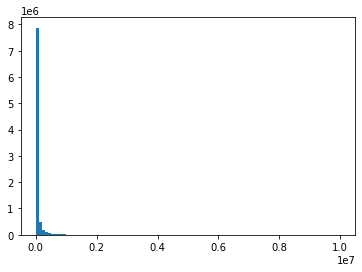

In [106]:
plt.hist(df['currentapprovalamount'], bins=100)

In [107]:
df['originatinglender'].value_counts()

Prestamos CDFI, LLC                          476874
Capital Plus Financial, LLC                  403505
Cross River Bank                             394679
Bank of America, National Association        356986
JPMorgan Chase Bank, National Association    316061
                                              ...  
Members Heritage CU                               1
New Bedford CU                                    1
Five Star of Maryland FCU                         1
North Cambridge Co-Operative Bank                 1
T M H FCU                                         1
Name: originatinglender, Length: 4886, dtype: int64

In [108]:
df.groupby(['originatinglender'])['currentapprovalamount'].sum().sort_values(ascending=False)

originatinglender
JPMorgan Chase Bank, National Association     30694795665.67
Bank of America, National Association         26053443664.59
PNC Bank, National Association                13483010569.14
Truist Bank d/b/a Branch Banking & Trust Co   12933509357.54
Wells Fargo Bank, National Association        11066018295.69
                                                   ...      
North Cambridge Co-Operative Bank                    8380.00
South Side Community FCU                             6427.00
New Bedford CU                                       5824.00
One Vision FCU                                       5468.75
High Peaks FCU                                       2500.00
Name: currentapprovalamount, Length: 4886, dtype: float64

In [109]:
print("Total Current Approval Amount: " + "{:,}".format(df['currentapprovalamount'].sum()))

Total Current Approval Amount: 589,909,198,479.669


In [110]:
print("Total Forgiveness Amount: " + "{:,}".format(df['forgivenessamount'].sum()))


Total Forgiveness Amount: 387,036,551,909.91974


# Observing relationship between Forgiveness amount and Jobs created

Linear Regression

In [117]:
new_df = df[['jobsreported', 'forgivenessamount']].copy().dropna()
new_df.head()

,jobsreported,forgivenessamount
0,170.00,137747.78
1,8.00,110881.96
2,20.00,91404.43
3,6.00,79699.96
4,4.00,57922.48


In [118]:
new_df.describe()

,jobsreported,forgivenessamount
count,3999450.00,3999450.00
mean,11.29,96772.29
std,30.74,317108.31
min,0.00,0.01
25%,1.00,10823.23
50%,3.00,22808.55
75%,9.00,69227.03
max,500.00,10123888.89


<AxesSubplot:>

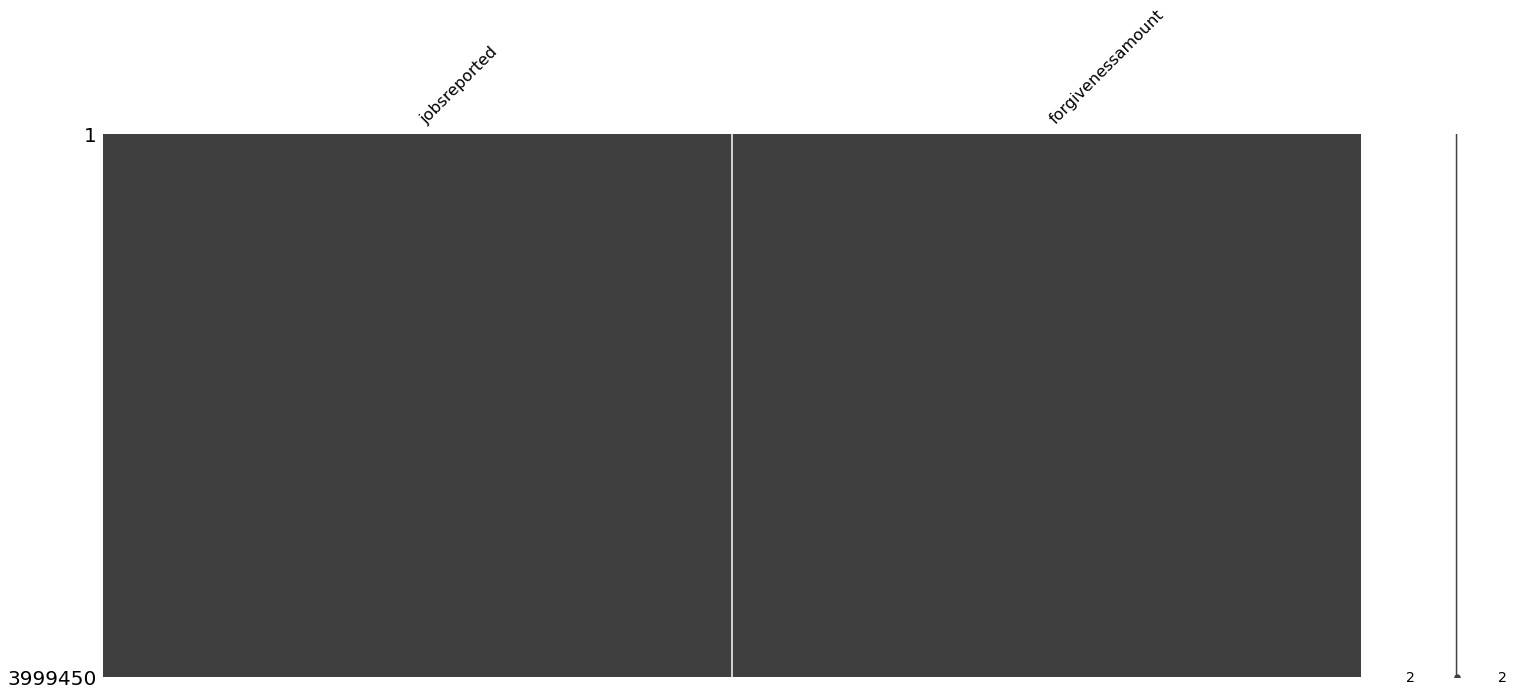

In [119]:
msno.matrix(new_df)

In [139]:
X = np.array(new_df['forgivenessamount'], dtype=np.float32)
y = np.array(new_df['jobsreported'], dtype=np.float32)



In [140]:
X = torch.from_numpy(X)
y = torch.from_numpy(y)

In [143]:
dataset = TensorDataset(X, y)

In [144]:
len(dataset)

3999450

In [145]:
dataset[:3]

(tensor([137747.7812, 110881.9609,  91404.4297]), tensor([170.,   8.,  20.]))

In [ ]:
datalen = len(dataset)


train_data, test_data = torch.utils.data.random_split(dataset, )

# Linear Regression Using Pytorch

In [128]:
class LinearRegression(nn.Module):
    def __init__(self, n_inputs, n_outputs):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(n_inputs, n_outputs)

    def forward(self, x): 
        out = self.linear(x)
        return out 

Initiate model and set params 

In [129]:
n_inputs = 1    # number of features (x)
n_outputs = 1   # number of labels   (y)
learning_rate = 0.01
n_epochs = 100

model = LinearRegression(n_inputs, n_outputs)

Loss functions and optimizer. Mean Squared Error will calculate the loss and optimization will be donne using Stochastic Gradient Descent. 

In [130]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [131]:
for epoch in range(n_epochs):

    inputs = torch.from_numpy(X_train)
    labels = torch.from_numpy(y_train)

    optimizer.zero_grad()
    outputs = model(inputs)

    loss = criterion(outputs, labels)
    print(loss)
    loss.backward()
    optimizer.step()

    print(f'epoch {epoch}, loss {loss.item()}')
    


tensor(2.1955e+10, grad_fn=<MseLossBackward0>)
epoch 0, loss 21954650112.0
tensor(1.0465e+29, grad_fn=<MseLossBackward0>)
epoch 1, loss 1.0465287364245436e+29
tensor(inf, grad_fn=<MseLossBackward0>)
epoch 2, loss inf
tensor(inf, grad_fn=<MseLossBackward0>)
epoch 3, loss inf
tensor(inf, grad_fn=<MseLossBackward0>)
epoch 4, loss inf
tensor(nan, grad_fn=<MseLossBackward0>)
epoch 5, loss nan
tensor(nan, grad_fn=<MseLossBackward0>)
epoch 6, loss nan
tensor(nan, grad_fn=<MseLossBackward0>)
epoch 7, loss nan
tensor(nan, grad_fn=<MseLossBackward0>)
epoch 8, loss nan
tensor(nan, grad_fn=<MseLossBackward0>)
epoch 9, loss nan
tensor(nan, grad_fn=<MseLossBackward0>)
epoch 10, loss nan
tensor(nan, grad_fn=<MseLossBackward0>)
epoch 11, loss nan
tensor(nan, grad_fn=<MseLossBackward0>)
epoch 12, loss nan
tensor(nan, grad_fn=<MseLossBackward0>)
epoch 13, loss nan
tensor(nan, grad_fn=<MseLossBackward0>)
epoch 14, loss nan
tensor(nan, grad_fn=<MseLossBackward0>)
epoch 15, loss nan
tensor(nan, grad_fn=<Ms